In [168]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import seaborn as sns

In [70]:
series = pd.read_csv('series_28204_2010.csv')

In [71]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
warnings.filterwarnings("ignore")

lowest_aic = []
params_list = []
seas_params_list = []



for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(series,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            
            
        except:
            continue

In [157]:
params_list

[]

In [153]:
testr

((1, 1, 1), (1, 1, 1, 12), 1328.065987341046)

In [136]:
p_1 = []
p_2 = []
p_3 = []
P_1 = []
P_2 = []
P_3 = []
P_4 = []
aic_min = []


for x in range(len(aic_scores_mod_list)):
    for y in aic_scores_mod_list:
        if y == min(aic_scores_mod_list) and len(aic_min) < 1:
            aic_min.append(y)
            p_1=params_list[x][0]
            p_2=params_list[x][1]
            p_3=params_list[x][2]
            P_1=seas_params_list[x][0]
            P_2=seas_params_list[x][1]
            P_3=seas_params_list[x][2]
            P_4=seas_params_list[x][3]
print(aic_min)            
print(p_1,p_2,p_3)
print(P_1,P_2,P_3,P_4)

[1328.0371746244832]
0 0 0
0 0 0 12


In [79]:
mod = sm.tsa.statespace.SARIMAX(series,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5577      0.116      4.804      0.000       0.330       0.785
ma.L1          0.6328      0.120      5.274      0.000       0.398       0.868
ma.S.L12      -0.0303      0.040     -0.767      0.443      -0.108       0.047
sigma2      4.333e+06   1.08e+06      4.014      0.000    2.22e+06    6.45e+06


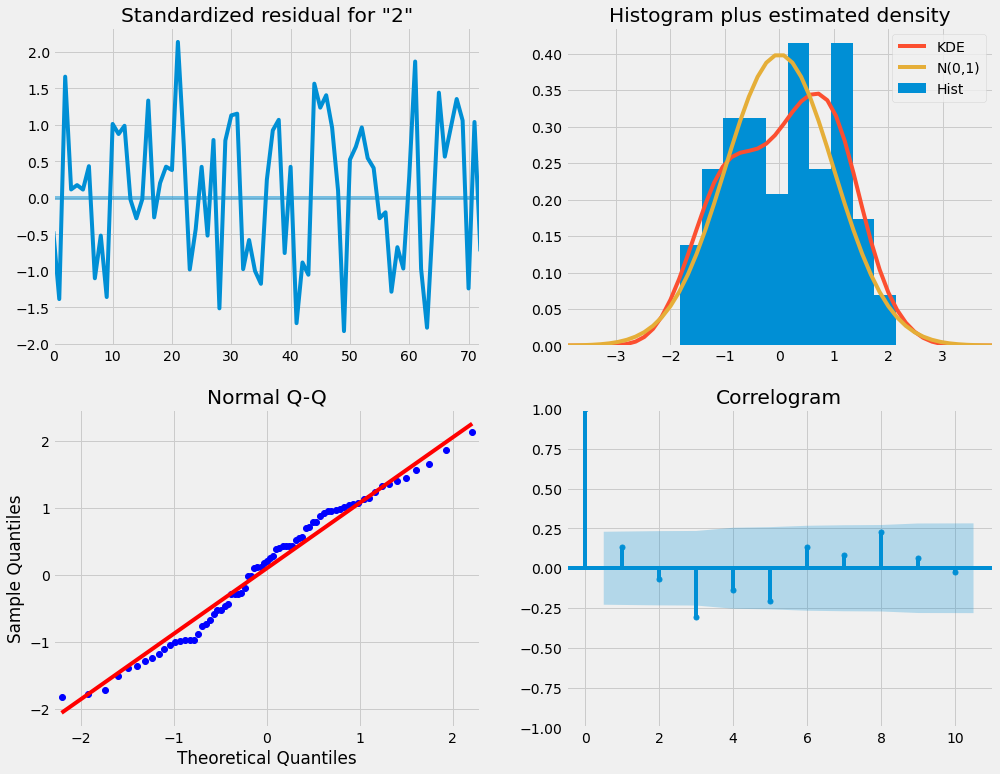

In [80]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

Series 2010-2018
--

In [81]:
# Now running the full time series (including from 1996-2008)
series2 = pd.read_csv('top_zip_series.csv')

In [90]:
warnings.filterwarnings("ignore")

aic_scores_mod2_list = []
params2_list = []
seas_params2_list = []

for param2 in pdq:
    for param_seasonal2 in seasonal_pdq:
        try:
            mod2 = sm.tsa.statespace.SARIMAX(series2,
                                            order=param2,
                                            seasonal_order=param_seasonal2,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results2 = mod2.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param2, param_seasonal2, results2.aic))
            aic_scores_mod2_list.append(results2.aic)
            params2_list.append(param2)
            seas_params2_list.append(param_seasonal2)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7484.146673636384
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6991.1848581238355
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:5942.374139480978
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:5669.016677775853
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:5861.684910508812
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:5807.2950076185925
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:5508.766073310061
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:7208.984469011708
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:7265.320752515131
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:7258.551100172991
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:5951.808786245938
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:8026.060306957823
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:7387.587944340341
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:6873.399271025764
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:5475.894889922207
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:7270.781199736346
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:4980.086862365197
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4728.678410516746
ARIMA(0,

In [83]:
mod2 = sm.tsa.statespace.SARIMAX(series2,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results2 = mod2.fit()

print(results2.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6708      0.058     11.658      0.000       0.558       0.784
ma.L1          0.6382      0.044     14.465      0.000       0.552       0.725
ma.S.L12      -0.2370      0.036     -6.640      0.000      -0.307      -0.167
sigma2      2.379e+06   2.56e+05      9.297      0.000    1.88e+06    2.88e+06


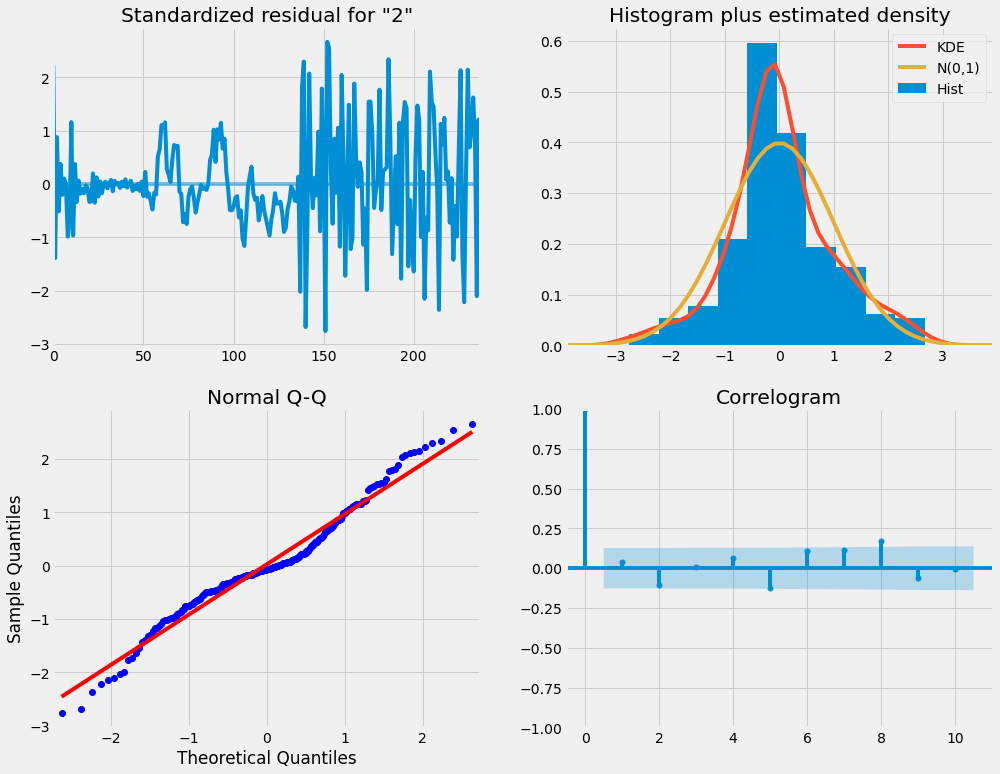

In [84]:
results2.plot_diagnostics(figsize=(15, 12))
plt.show()

ARIMA: A Better Fit For 2010-2018 Series Data
--

The lowest AIC score for 2010-2018 Series Data is ~1328 while the lowest AIC score for the complete Series is ~4151, showing us that the 2010-2018 Series can be handled better with ARIMA than that of the complete Series data.

However, what is also interested is that both Series's best AIC scores corresponded with the same Terms.

---

Comparing The AIC Scores From Full Series Zip Codes With Theier 2010-2018 Counterparts
--
Now, what I'd like to do is compare other zip codes in the same way I just did above. This will also help me to understand which zip code to proceed further with, for initial train-test prediction and forecasting.

In [155]:
warnings.filterwarnings("ignore")

def comparing_series(series1,series2):
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(series,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()

                print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            
            except:
                continue